In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn import impute

# Custom K- Means Clustering
<b><i>  By Danial

In [7]:
# Here we will make our own K-Means Clustering algorithm 
class KMeans:
    def __init__(self, K: int= 3, max_iters: int= 100) -> None:
        self.K = K
        self.max_iters = max_iters
        self.centroids = []

    def predict(self, X):
        num_samples, num_features = X.shape
        self.centroids = X[np.random.choice(num_samples, self.K, replace=False)] # Initializing centrouds randomly from the data
        for _ in range(self.max_iters):
            y = []
           
            for sample_i, sample in enumerate(X):
                distances = [np.sqrt(np.sum((sample - centroid)**2)) for centroid in self.centroids] # Returns a list of distances of all data points from the centroids
                cluster_i = np.argmin(distances) # We got 3 distances if we have 3 centroids, then we select the minimum distance
                y.append(cluster_i) # Store the cluster number of each data point
                
            y = np.array(y)

            cluster_indices = []
            for i in range(self.K):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])# Inside the clusters, find the mean in each, then select those means as new centroids

            if np.max(self.centroids - cluster_centers) < 0.0001:
                break
            else:
                self.centroids = cluster_centers # Else select cluster centers as new centroids, which we found from finding the least Euclidean Distance

            return y    

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)


            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.title("Age and Spending Score (1-100)")
        plt.xlabel("Age")
        plt.ylabel("Spending Score")
        plt.show()


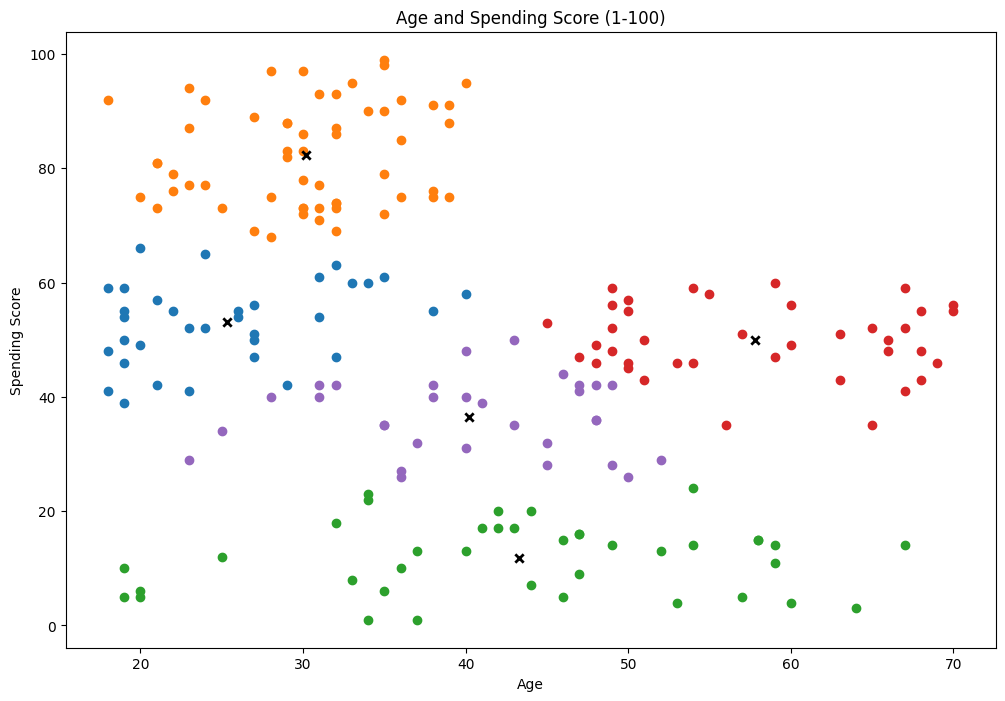

In [14]:
import seaborn as sns
x_train = pd.read_csv('Mall_Customers.csv')
x_train = x_train.drop(['CustomerID','Gender', 'Annual Income (k$)'], axis=1)
model = KMeans(K=5, max_iters=1000)
model.predict(x_train.values)

model.plot()